In [1]:
import datetime
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap, cm

import matplotlib.pyplot as plt

In [17]:
 def plot_global_density(plot_date, rho_reconstructed, lon, lat, lon_view=0, lat_view=0, file_name=None):  
    fig = plt.figure()
    fig = plt.figure(figsize=(15,7))
    
    ax = fig.add_subplot(121)
    
    #ax.set_title("ML model output")
    m = Basemap(projection='ortho',lat_0=lat_view,lon_0=lon_view,resolution='l')
    lon2, lat2 = np.meshgrid(lon,lat)
    x, y = m(lon2, lat2)
    #fig = plt.figure(figsize=(15,7))
    #m.fillcontinents(color='gray',lake_color='gray')
    m.drawcoastlines()
    m.drawparallels(np.arange(-90.,90.,10.))
    m.drawmeridians(np.arange(-180.,180.,10.))
    m.drawmapboundary(fill_color='white')
    cs = m.contourf(x,y,rho_reconstructed,cmap=plt.cm.get_cmap('jet'), vmin=rho_reconstructed.min(), vmax=rho_reconstructed.max())
    #cs=m.contour(x,y,rho_reconstructed,105,linewidths=4.5)

    #cs = m.contourf(x,y,rho_reconstructed,clevs,cmap=cm.s3pcpn)
    #cb = m.colorbar()
    cb = m.colorbar(label='Thermospheric Density [kg/m^3]')
#    cs=m.nightshade(plot_date)

    if file_name is not None:
        plt.tight_layout()
        fig.savefig(file_name)
    plt.show()
        
    
    plt.close(fig)    
    return None

In [3]:
dates_list = pd.date_range(datetime.datetime(2018,1,1), periods=200, freq='15min').to_pydatetime().tolist()


In [4]:
rho_reconstructed=np.load("/Users/giacomoacciarini/Downloads/map.npz.npy")


In [10]:
max_log_density=5.210227413823442
min_log_density=-18.500666643233345

rho=rho_reconstructed*(max_log_density-min_log_density)+min_log_density
rho=np.exp(rho)*1e-12




<Figure size 432x288 with 0 Axes>

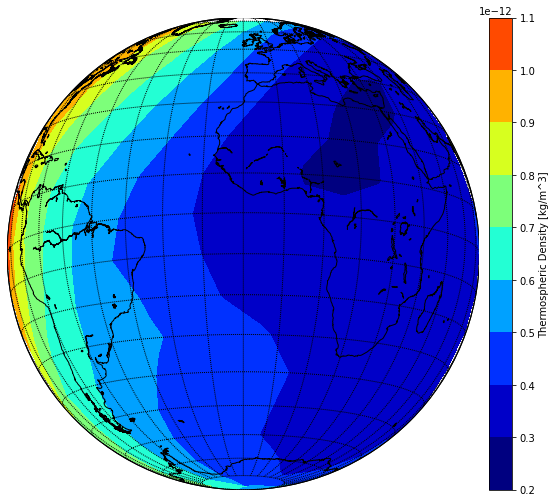

In [18]:
plot_global_density(plot_date=dates_list[0],rho_reconstructed=rho,lon=np.linspace(-180,180,36),lat=np.linspace(-90,90,19), lon_view=-10, lat_view=-10, file_name='thermo_Plot_1.pdf')



<Figure size 432x288 with 0 Axes>

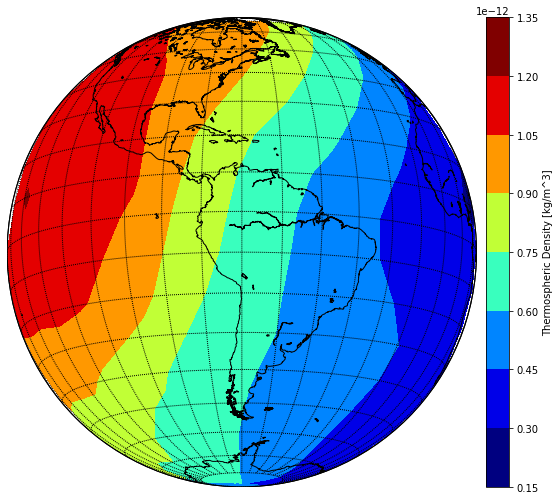

In [19]:
plot_global_density(plot_date=dates_list[0],rho_reconstructed=rho,lon=np.linspace(-180,180,36),lat=np.linspace(-90,90,19), lon_view=-70, lat_view=-10, file_name='thermo_Plot_2.pdf')




<Figure size 432x288 with 0 Axes>

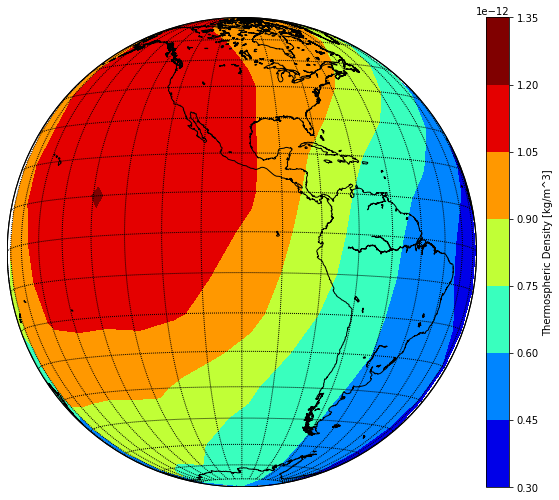

In [20]:
plot_global_density(plot_date=dates_list[0],rho_reconstructed=rho,lon=np.linspace(-180,180,36),lat=np.linspace(-90,90,19), lon_view=-100, lat_view=-5, file_name='thermo_Plot_3.pdf')





In [17]:
from astropy.time import Time

t = Time('2006-01-15 21:24:37.5', scale='utc', location=('120d', '45d'))
arcsec=[]

for lon in range(-180,180):
    for lat in range(0,1):
        
        t = Time('2006-01-15 09:24:37.5', scale='utc', location=(f'{lon}d', f'{lat}d'))
        
        
        
        arcsec.append(t.sidereal_time('mean').rad)
        

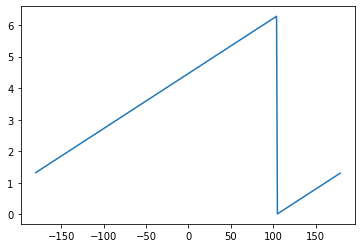

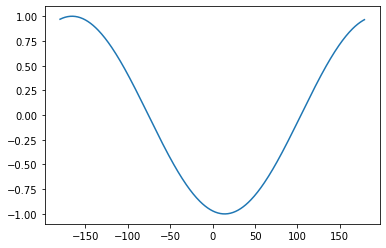

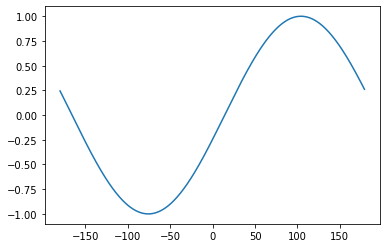

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.plot(range(-180,180),(arcsec))

plt.figure()
plt.plot(range(-180,180),np.sin(arcsec))
plt.figure()
plt.plot(range(-180,180),np.cos(arcsec))
